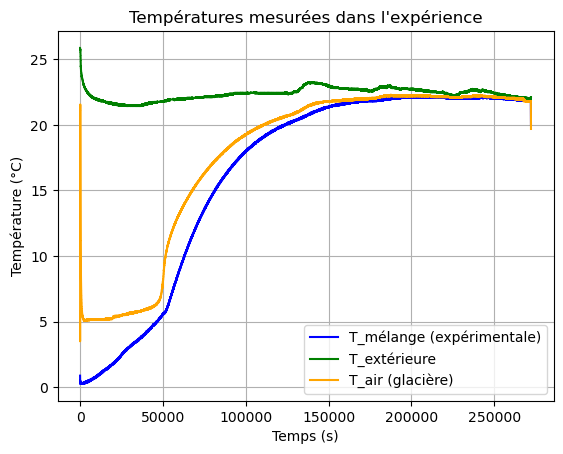

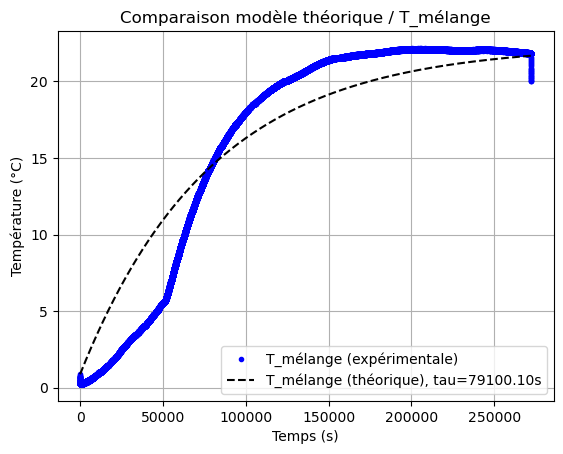

Constante de temps tau (ajustée) : 79100.10 s


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Lecture du fichier
data = np.loadtxt('DATA_SANS_PELTIER.txt')
Tinterne = data[:, 0]
Text = data[:, 1]
Tair = data[:, 2]
temps = np.arange(len(data))  # car chaque mesure est prise chaque seconde

# Tracer les températures expérimentales
plt.plot(temps, Tinterne, label="T_mélange (expérimentale)", color="blue")
plt.plot(temps, Text, label="T_extérieure", color="green")
plt.plot(temps, Tair, label="T_air (glacière)", color="orange")

plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Températures mesurées dans l'expérience")
plt.legend()
plt.grid(True)

# 👉 Enregistrer AVANT d’afficher
plt.savefig("sans_peltier_intervalle_complet.png", dpi=300, bbox_inches="tight")
plt.show()



# 3. Calcul de la température extérieure moyenne
Text_moyenne = np.mean(Text)

# 4. Définir le modèle théorique
def modele_exponentiel(t, tau):
    T0 = Tinterne[0]
    return Text_moyenne + (T0 - Text_moyenne) * np.exp(-t / tau)

# 5. Ajustement de tau sur les données de Tinterne
popt, _ = curve_fit(modele_exponentiel, temps, Tinterne, p0=[100])
tau_fit = popt[0]

# 6. Tracer la courbe théorique
Ttheorique = modele_exponentiel(temps, tau_fit)

plt.plot(temps, Tinterne, 'b.', label="T_mélange (expérimentale)")

plt.plot(temps, Ttheorique, 'k--', label=f"T_mélange (théorique), tau={tau_fit:.2f}s")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Comparaison modèle théorique / T_mélange")
plt.legend()
plt.grid(True)
plt.show()

print(f"Constante de temps tau (ajustée) : {tau_fit:.2f} s")


C:\Users\WeeeFund\AppData\Local\Temp\ipykernel_13724\70599568.py:40: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(modele_exponentiel, temps, Tinterne, p0=[100])


✅ Constante de temps ajustée : tau = 100.00 s


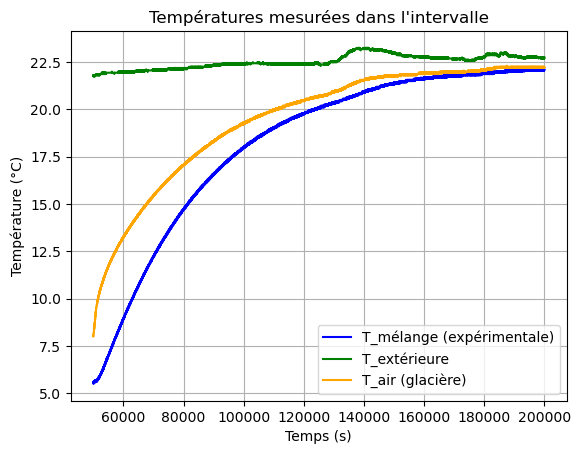

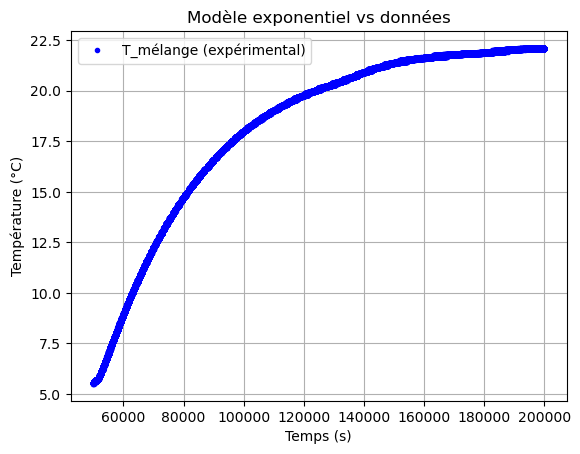

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Lecture du fichier
data = np.loadtxt('DATA_SANS_PELTIER.txt')
Tinterne = data[:, 0]
Text = data[:, 1]
Tair = data[:, 2]
temps = np.arange(len(data))  # chaque seconde

# 2. Garder uniquement les points entre 50000 et 200000 secondes
mask = (temps >= 50000) & (temps <= 200000)
temps = temps[mask]
Tinterne = Tinterne[mask]
Text = Text[mask]
Tair = Tair[mask]   

# 3. Tracer les températures expérimentales
plt.figure()
plt.plot(temps, Tinterne, label="T_mélange (expérimentale)", color="blue")
plt.plot(temps, Text, label="T_extérieure", color="green")
plt.plot(temps, Tair, label="T_air (glacière)", color="orange")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Températures mesurées dans l'intervalle")
plt.legend()
plt.grid(True)
plt.savefig("01_temperatures_experimentales.png", dpi=300)

# 4. Calcul de Text moyenne
Text_moyenne = np.mean(Text)

# 5. Définir modèle exponentiel
def modele_exponentiel(t, tau):
    T0 = 6
    return Text_moyenne + (T0 - Text_moyenne) * np.exp(-t / tau)

# 6. Ajustement
popt, _ = curve_fit(modele_exponentiel, temps, Tinterne, p0=[100])
tau_fit = popt[0]

# 7. Tracer modèle théorique
Ttheorique = modele_exponentiel(temps, tau_fit)

plt.figure()
plt.plot(temps, Tinterne, 'b.', label="T_mélange (expérimental)")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Modèle exponentiel vs données")
plt.legend()
plt.grid(True)
plt.savefig("02_modele_theorique.png", dpi=300)

print(f"✅ Constante de temps ajustée : tau = {tau_fit:.2f} s")


C:\Users\WeeeFund\AppData\Local\Temp\ipykernel_13724\2854085581.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_delta, _ = curve_fit(modele_deltaT, temps, deltaT, p0=[deltaT[0], 100])


✅ Ajustement ΔT :
    delta0 = 16.25 °C
    tau = 100.00 s


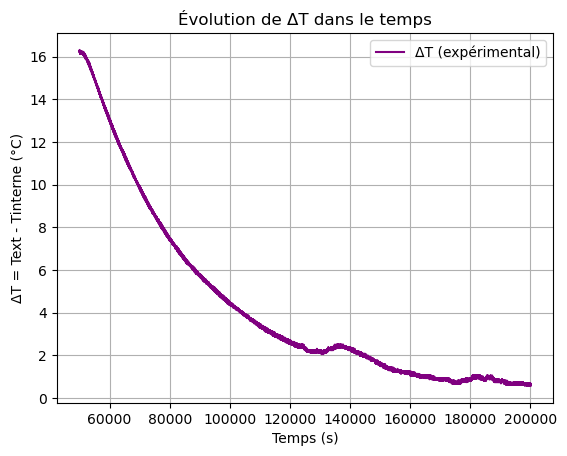

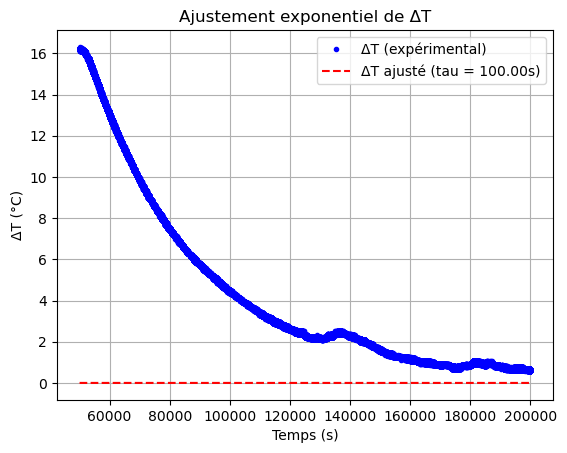

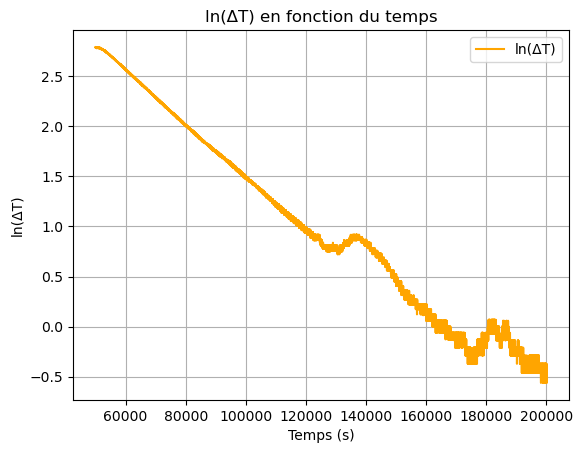

In [11]:
mask = (temps >= 50000) & (temps <= 200000)
# 2. Garder uniquement les points entre 50000 et 200000 secondes
mask = (temps >= 50000) & (temps <= 200000)
temps = temps[mask]
Tinterne = Tinterne[mask]
Text = Text[mask]
Tair = Tair[mask]
# 8. Calcul de ΔT
deltaT = Text - Tinterne

plt.figure()
plt.plot(temps, deltaT, label="ΔT (expérimental)", color="purple")
plt.xlabel("Temps (s)")
plt.ylabel("ΔT = Text - Tinterne (°C)")
plt.title("Évolution de ΔT dans le temps")
plt.legend()
plt.grid(True)
plt.savefig("03_deltaT_experimentale.png", dpi=300)

# 9. Ajustement exponentiel sur ΔT
def modele_deltaT(t, delta0, tau):
    return delta0 * np.exp(-t / tau)

popt_delta, _ = curve_fit(modele_deltaT, temps, deltaT, p0=[deltaT[0], 100])
delta0_fit, tau_delta_fit = popt_delta
deltaT_fit = modele_deltaT(temps, delta0_fit, tau_delta_fit)

plt.figure()
plt.plot(temps, deltaT, 'b.', label="ΔT (expérimental)")
plt.plot(temps, deltaT_fit, 'r--', label=f"ΔT ajusté (tau = {tau_delta_fit:.2f}s)")
plt.xlabel("Temps (s)")
plt.ylabel("ΔT (°C)")
plt.title("Ajustement exponentiel de ΔT")
plt.legend()
plt.grid(True)
plt.savefig("04_deltaT_ajustement.png", dpi=300)

# 10. ln(ΔT)
ln_deltaT = np.log(deltaT)

plt.figure()
plt.plot(temps, ln_deltaT, label="ln(ΔT)", color="orange")
plt.xlabel("Temps (s)")
plt.ylabel("ln(ΔT)")
plt.title("ln(ΔT) en fonction du temps")
plt.grid(True)
plt.legend()
plt.savefig("05_ln_deltaT.png", dpi=300)

# Affichage des résultats d'ajustement
print(f"✅ Ajustement ΔT :")
print(f"    delta0 = {delta0_fit:.2f} °C")
print(f"    tau = {tau_delta_fit:.2f} s")


In [15]:
# Filtrer uniquement les points où deltaT > 0 (sinon ln et fit explosent)
mask_pos = deltaT > 0
temps_pos = temps[mask_pos]
deltaT_pos = deltaT[mask_pos]

# Ajustement exponentiel uniquement sur points valides
def modele_deltaT(t, delta0, tau):
    return delta0 * np.exp(-t / tau)

try:
    popt_delta, _ = curve_fit(modele_deltaT, temps_pos, deltaT_pos, p0=[deltaT_pos[0]])
    delta0_fit, tau_delta_fit = popt_delta
    deltaT_fit = modele_deltaT(temps, delta0_fit, tau_delta_fit)

    plt.figure()
    plt.plot(temps, deltaT, 'b.', label="ΔT (expérimental)")
    plt.plot(temps, deltaT_fit, 'r--', label=f"ΔT ajusté (tau = {tau_delta_fit:.2f}s)")
    plt.xlabel("Temps (s)")
    plt.ylabel("ΔT (°C)")
    plt.title("Ajustement exponentiel de ΔT")
    plt.legend()
    plt.grid(True)
    plt.savefig("04_deltaT_ajustement.png", dpi=300)

    print(f"✅ Ajustement OK : delta0 = {delta0_fit:.2f}, tau = {tau_delta_fit:.2f}")

except Exception as e:
    print("❌ Problème pendant l'ajustement de ΔT :", str(e))


❌ Problème pendant l'ajustement de ΔT : modele_deltaT() missing 1 required positional argument: 'tau'


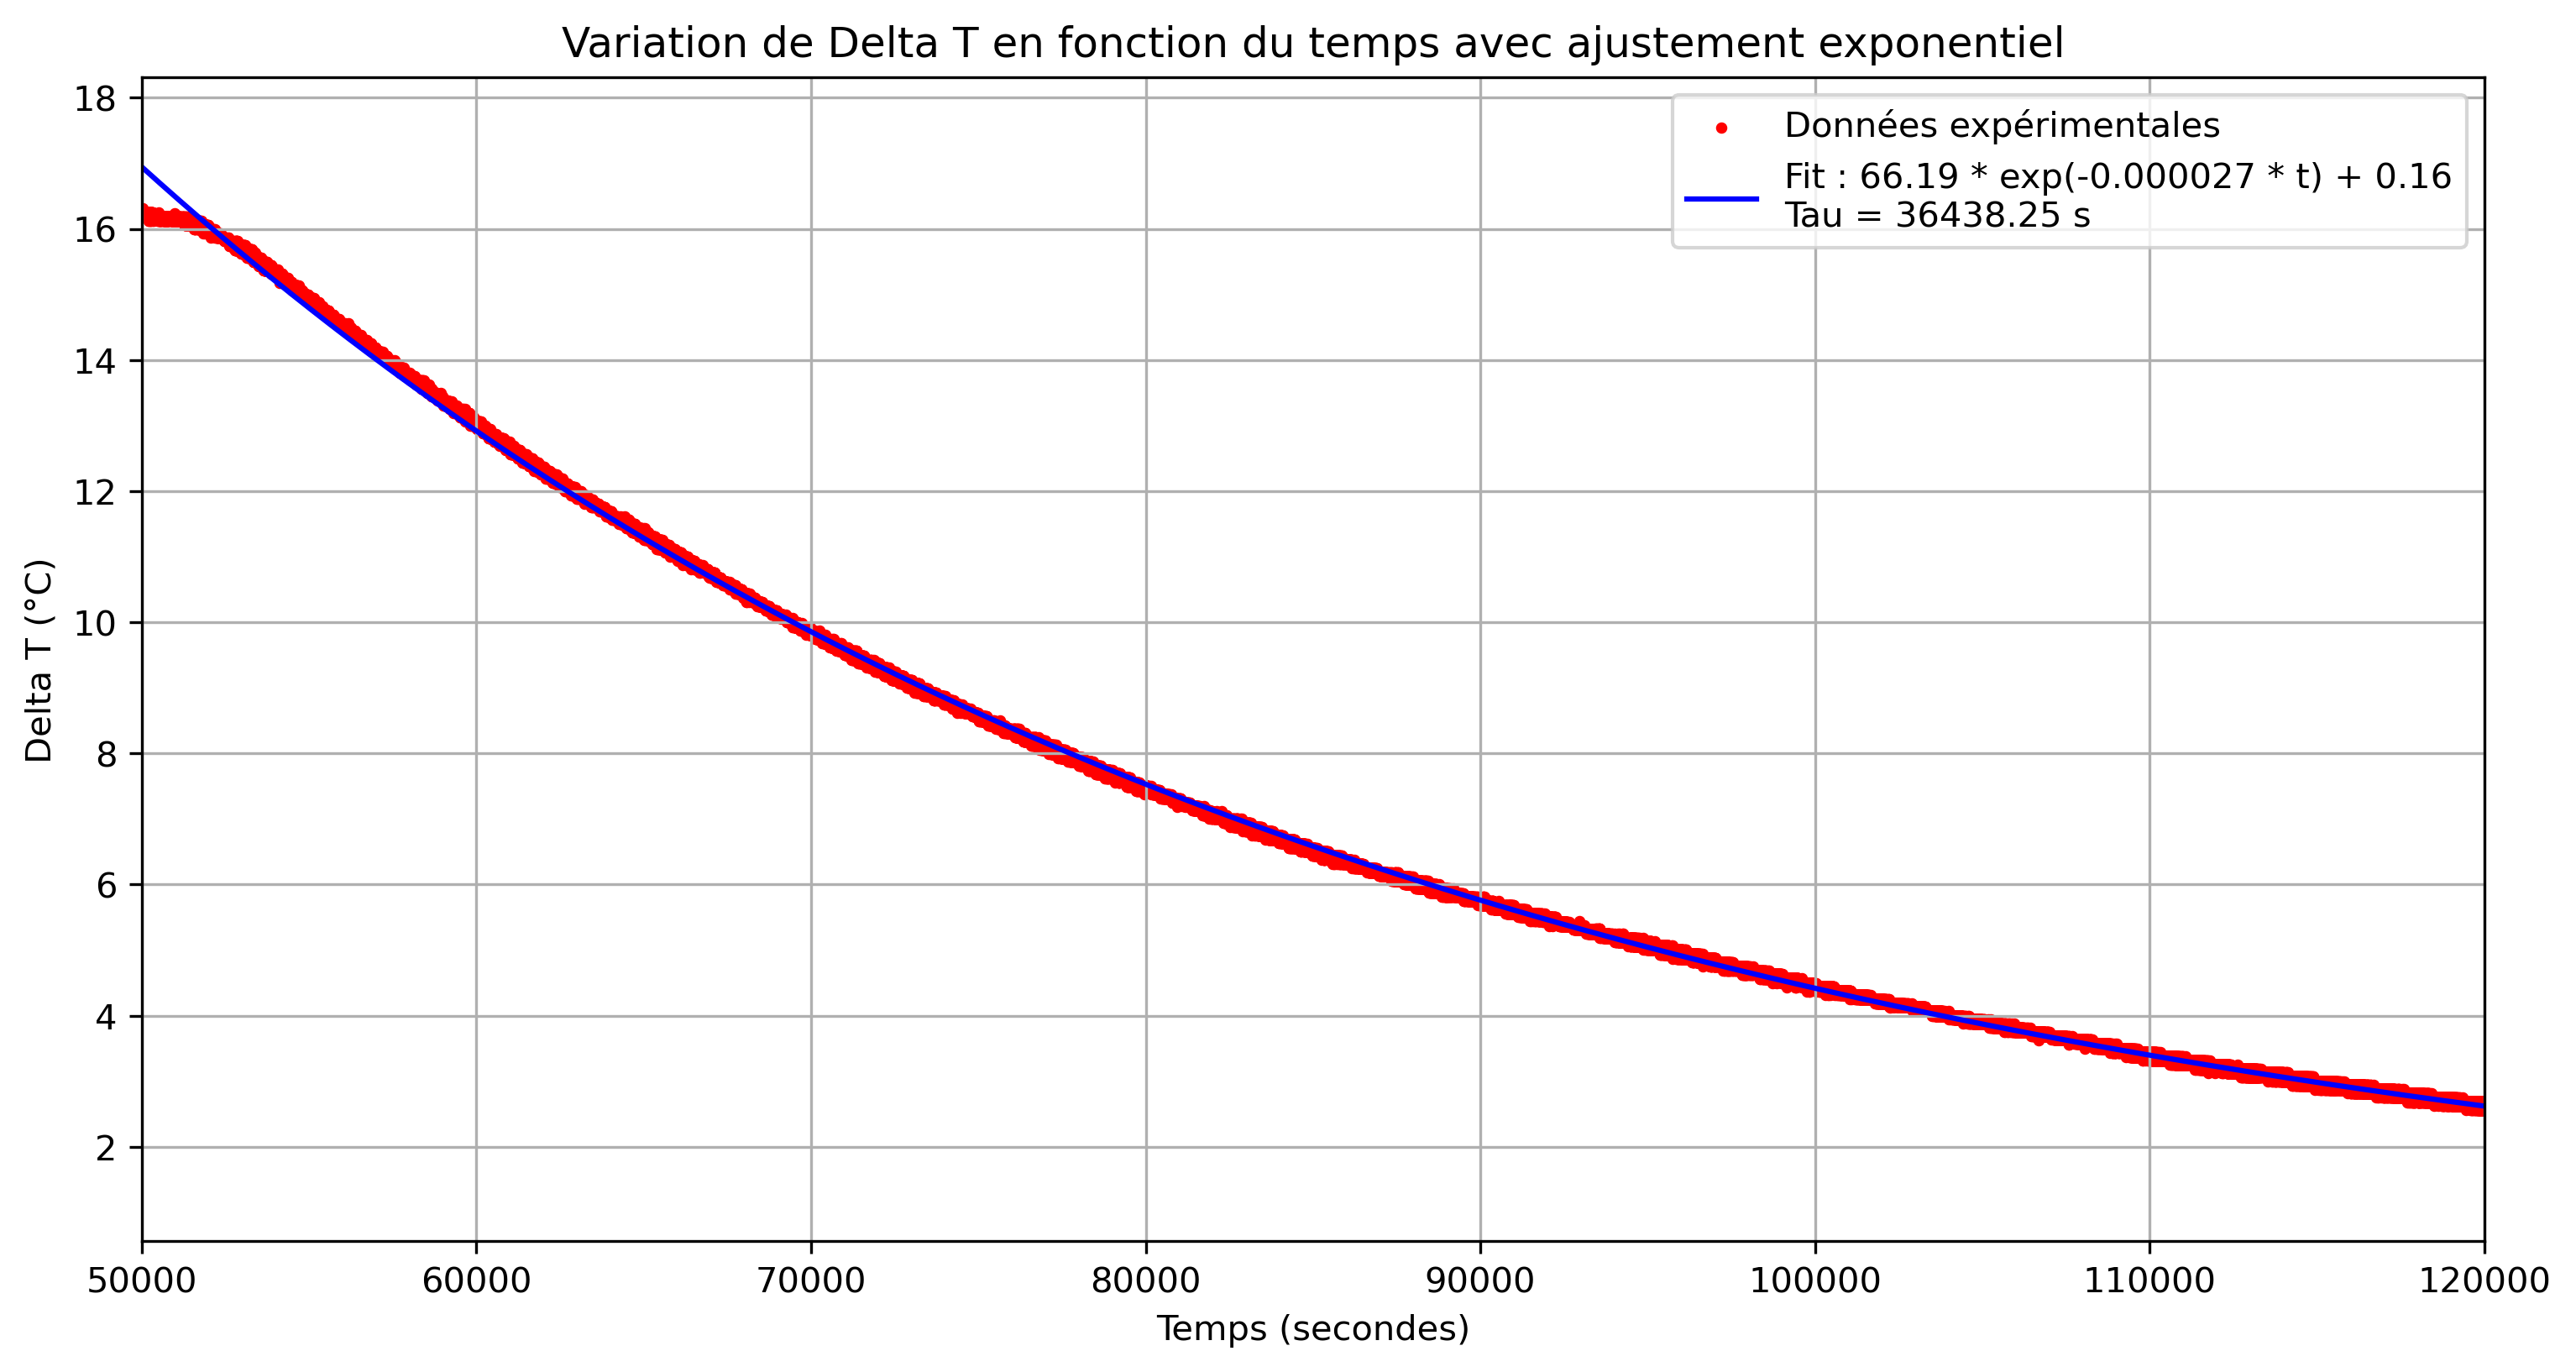

Équation ajustée : ΔT(t) = 66.19 * exp(-0.000027 * t) + 0.16
Valeur estimée de tau : 36438.25 secondes


In [19]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit



# Charger les données expérimentales depuis le fichier

data = np.loadtxt("DATA_SANS_PELTIER.txt")



# Extraire les colonnes

Tinterne = data[:, 0]
Text = data[:, 1]
Tair = data[:, 2]
temps = np.arange(len(data))  # chaque seconde



# Calcul de Delta T
# 2. Garder uniquement les points entre 50000 et 200000 secondes
mask = (temps >= 50000) & (temps <= 120000)
temps = temps[mask]
Tinterne = Tinterne[mask]
Text = Text[mask]
Tair = Tair[mask]
# 8. Calcul de ΔT


Text_moyenne = np.mean(Text)  # Moyenne

delta_T = Text - Tinterne  # Différence de température







# Définition du modèle exponentiel

def modele_expo(t, A, B, C):

    return A * np.exp(-B * t) + C



# Ajustement des données avec curve_fit

params_opt, params_cov = curve_fit(modele_expo, temps, delta_T, p0=[max(delta_T), 1e-5, min(delta_T)])

A_opt, B_opt, C_opt = params_opt



# Calcul de tau

tau = 1 / B_opt



# Tracer la courbe expérimentale

plt.figure(figsize=(12, 6), dpi=300)

plt.scatter(temps, delta_T, label="Données expérimentales", color='red', s=5)

plt.plot(temps, modele_expo(temps, *params_opt), label=f"Fit : {A_opt:.2f} * exp(-{B_opt:.6f} * t) + {C_opt:.2f}\nTau = {tau:.2f} s", color='blue')



# Ajuster les axes

plt.xlim(min(temps), max(temps))

plt.ylim(min(delta_T) - 2, max(delta_T) + 2)



# Ajouter des légendes et titres

plt.xlabel("Temps (secondes)")

plt.ylabel("Delta T (°C)")

plt.title("Variation de Delta T en fonction du temps avec ajustement exponentiel")

plt.legend()

plt.grid(True)



# Enregistrer l'image

plt.savefig("Delta_T_vs_temps_fit.png", format="png", dpi=300, bbox_inches="tight")

plt.show()



# Affichage de l'équation ajustée

print(f"Équation ajustée : ΔT(t) = {A_opt:.2f} * exp(-{B_opt:.6f} * t) + {C_opt:.2f}")

print(f"Valeur estimée de tau : {tau:.2f} secondes")

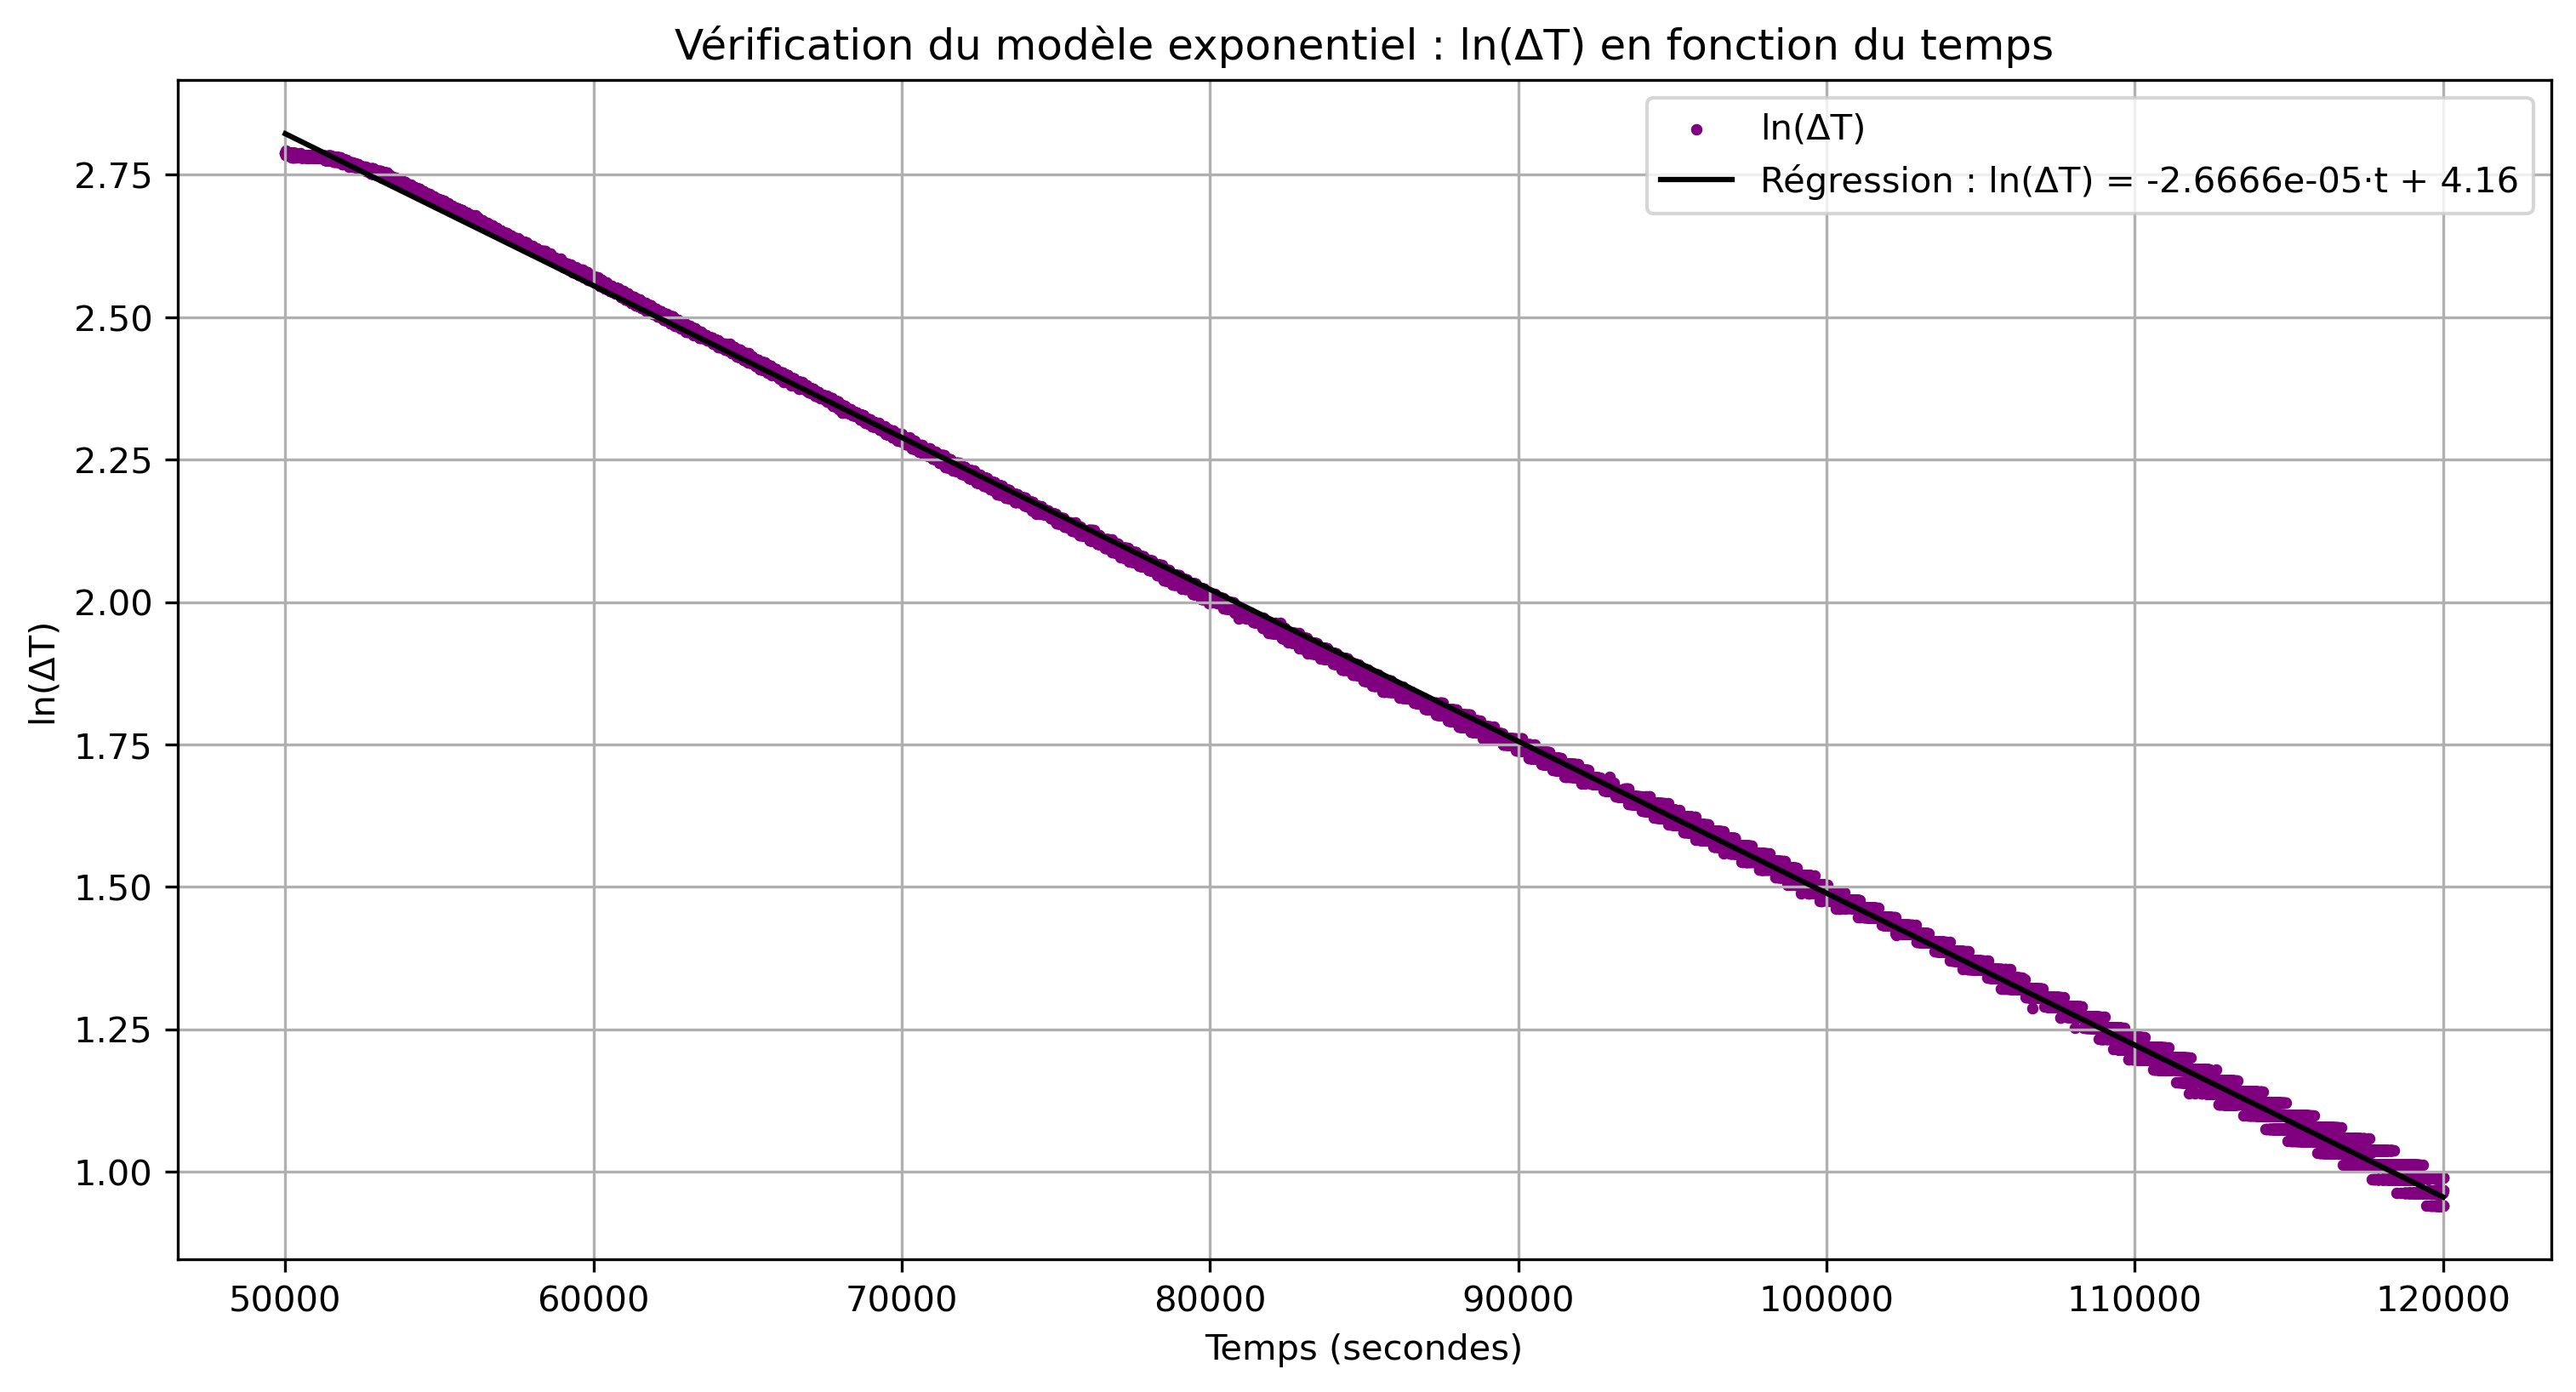

✅ Équation ajustée : ln(ΔT) = -2.6666e-05 * t + 4.16
➡️  Coefficient de corrélation R² = 0.9996


In [21]:
from scipy.stats import linregress

# Filtrer les valeurs où delta_T > 0
mask_positive = delta_T > 0
temps_ln = temps[mask_positive]
delta_T_ln = delta_T[mask_positive]
ln_delta_T = np.log(delta_T_ln)

# Régression linéaire : ln(ΔT) = a * t + b
slope, intercept, r_value, p_value, std_err = linregress(temps_ln, ln_delta_T)

# Équation droite : ln(ΔT) = slope * t + intercept
ln_fit = slope * temps_ln + intercept

# Tracer ln(ΔT)
plt.figure(figsize=(12, 6), dpi=300)
plt.scatter(temps_ln, ln_delta_T, label="ln(ΔT)", color="purple", s=5)
plt.plot(temps_ln, ln_fit, label=f"Régression : ln(ΔT) = {slope:.4e}·t + {intercept:.2f}", color="black")

# Ajustements esthétiques
plt.xlabel("Temps (secondes)")
plt.ylabel("ln(ΔT)")
plt.title("Vérification du modèle exponentiel : ln(ΔT) en fonction du temps")
plt.legend()
plt.grid(True)

# Sauvegarde de l'image
plt.savefig("ln_DeltaT_vs_temps.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

# Affichage des résultats
print(f"✅ Équation ajustée : ln(ΔT) = {slope:.4e} * t + {intercept:.2f}")
print(f"➡️  Coefficient de corrélation R² = {r_value**2:.4f}")


✅ Constante de temps ajustée : tau = 272791.05 s


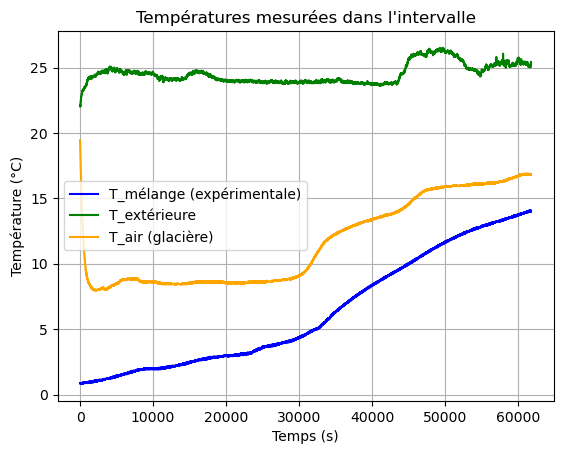

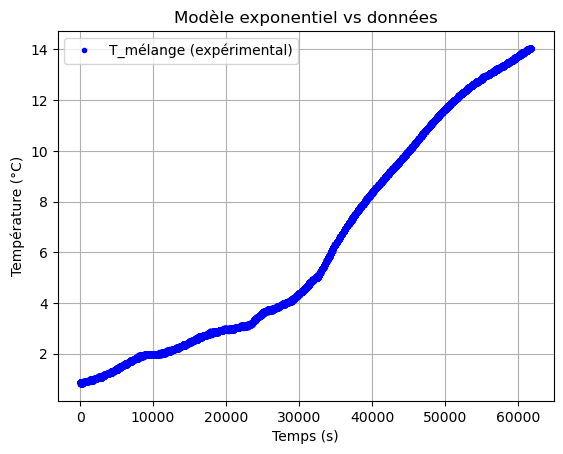

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Lecture du fichier
data = np.loadtxt('DATAPELTIER.txt')
Tinterne = data[:, 0]
Text = data[:, 1]
Tair = data[:, 2]
temps = np.arange(len(data))  # chaque seconde

# 2. Garder uniquement les points entre 50000 et 200000 secondes
  

# 3. Tracer les températures expérimentales
plt.figure()
plt.plot(temps, Tinterne, label="T_mélange (expérimentale)", color="blue")
plt.plot(temps, Text, label="T_extérieure", color="green")
plt.plot(temps, Tair, label="T_air (glacière)", color="orange")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Températures mesurées dans l'intervalle")
plt.legend()
plt.grid(True)
plt.savefig("01_temperatures_experimentales_peltier.png", dpi=300)

# 4. Calcul de Text moyenne
Text_moyenne = np.mean(Text)

# 5. Définir modèle exponentiel
def modele_exponentiel(t, tau):
    T0 = 6
    return Text_moyenne + (T0 - Text_moyenne) * np.exp(-t / tau)

# 6. Ajustement
popt, _ = curve_fit(modele_exponentiel, temps, Tinterne, p0=[100])
tau_fit = popt[0]

# 7. Tracer modèle théorique
Ttheorique = modele_exponentiel(temps, tau_fit)

plt.figure()
plt.plot(temps, Tinterne, 'b.', label="T_mélange (expérimental)")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Modèle exponentiel vs données")
plt.legend()
plt.grid(True)
plt.savefig("02_modele_theorique_peltier.png", dpi=300)

print(f"✅ Constante de temps ajustée : tau = {tau_fit:.2f} s")


C:\Users\WeeeFund\AppData\Local\Temp\ipykernel_13724\4242216853.py:41: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(modele_exponentiel, temps, Tinterne, p0=[100])


✅ Constante de temps ajustée : tau = 100.00 s


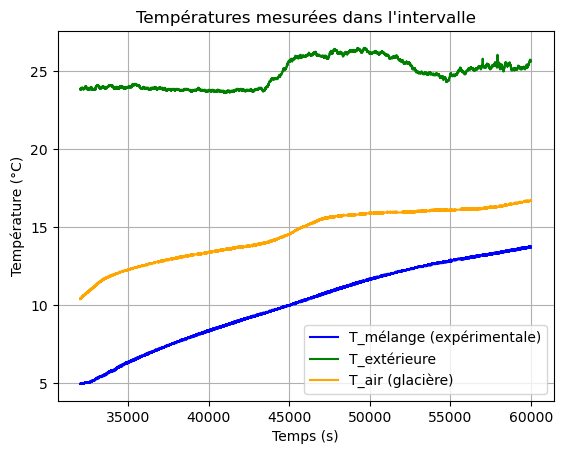

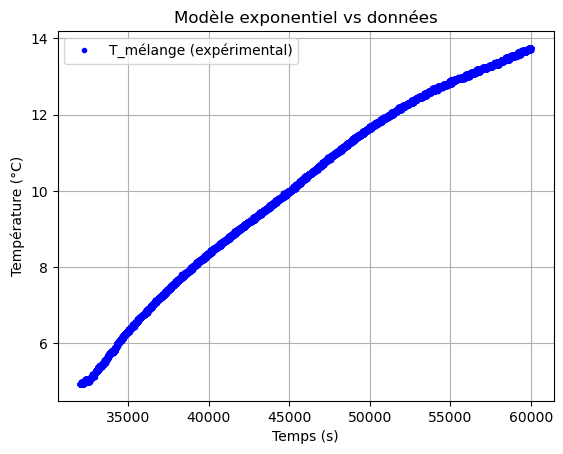

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Lecture du fichier
data = np.loadtxt('DATAPELTIER.txt')
Tinterne = data[:, 0]
Text = data[:, 1]
Tair = data[:, 2]
temps = np.arange(len(data))  # chaque seconde

# 2. Garder uniquement les points entre 50000 et 200000 secondes
  # 2. Garder uniquement les points entre 50000 et 200000 secondes
mask = (temps >= 32000) & (temps <= 60000)
temps = temps[mask]
Tinterne = Tinterne[mask]
Text = Text[mask]
Tair = Tair[mask] 

# 3. Tracer les températures expérimentales
plt.figure()
plt.plot(temps, Tinterne, label="T_mélange (expérimentale)", color="blue")
plt.plot(temps, Text, label="T_extérieure", color="green")
plt.plot(temps, Tair, label="T_air (glacière)", color="orange")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Températures mesurées dans l'intervalle")
plt.legend()
plt.grid(True)
plt.savefig("01_temperatures_experimentales_peltier_limite.png", dpi=300)

# 4. Calcul de Text moyenne
Text_moyenne = np.mean(Text)

# 5. Définir modèle exponentiel
def modele_exponentiel(t, tau):
    T0 = 6
    return Text_moyenne + (T0 - Text_moyenne) * np.exp(-t / tau)

# 6. Ajustement
popt, _ = curve_fit(modele_exponentiel, temps, Tinterne, p0=[100])
tau_fit = popt[0]

# 7. Tracer modèle théorique
Ttheorique = modele_exponentiel(temps, tau_fit)

plt.figure()
plt.plot(temps, Tinterne, 'b.', label="T_mélange (expérimental)")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Modèle exponentiel vs données")
plt.legend()
plt.grid(True)
plt.savefig("02_modele_theorique_peltier_limite.png", dpi=300)

print(f"✅ Constante de temps ajustée : tau = {tau_fit:.2f} s")


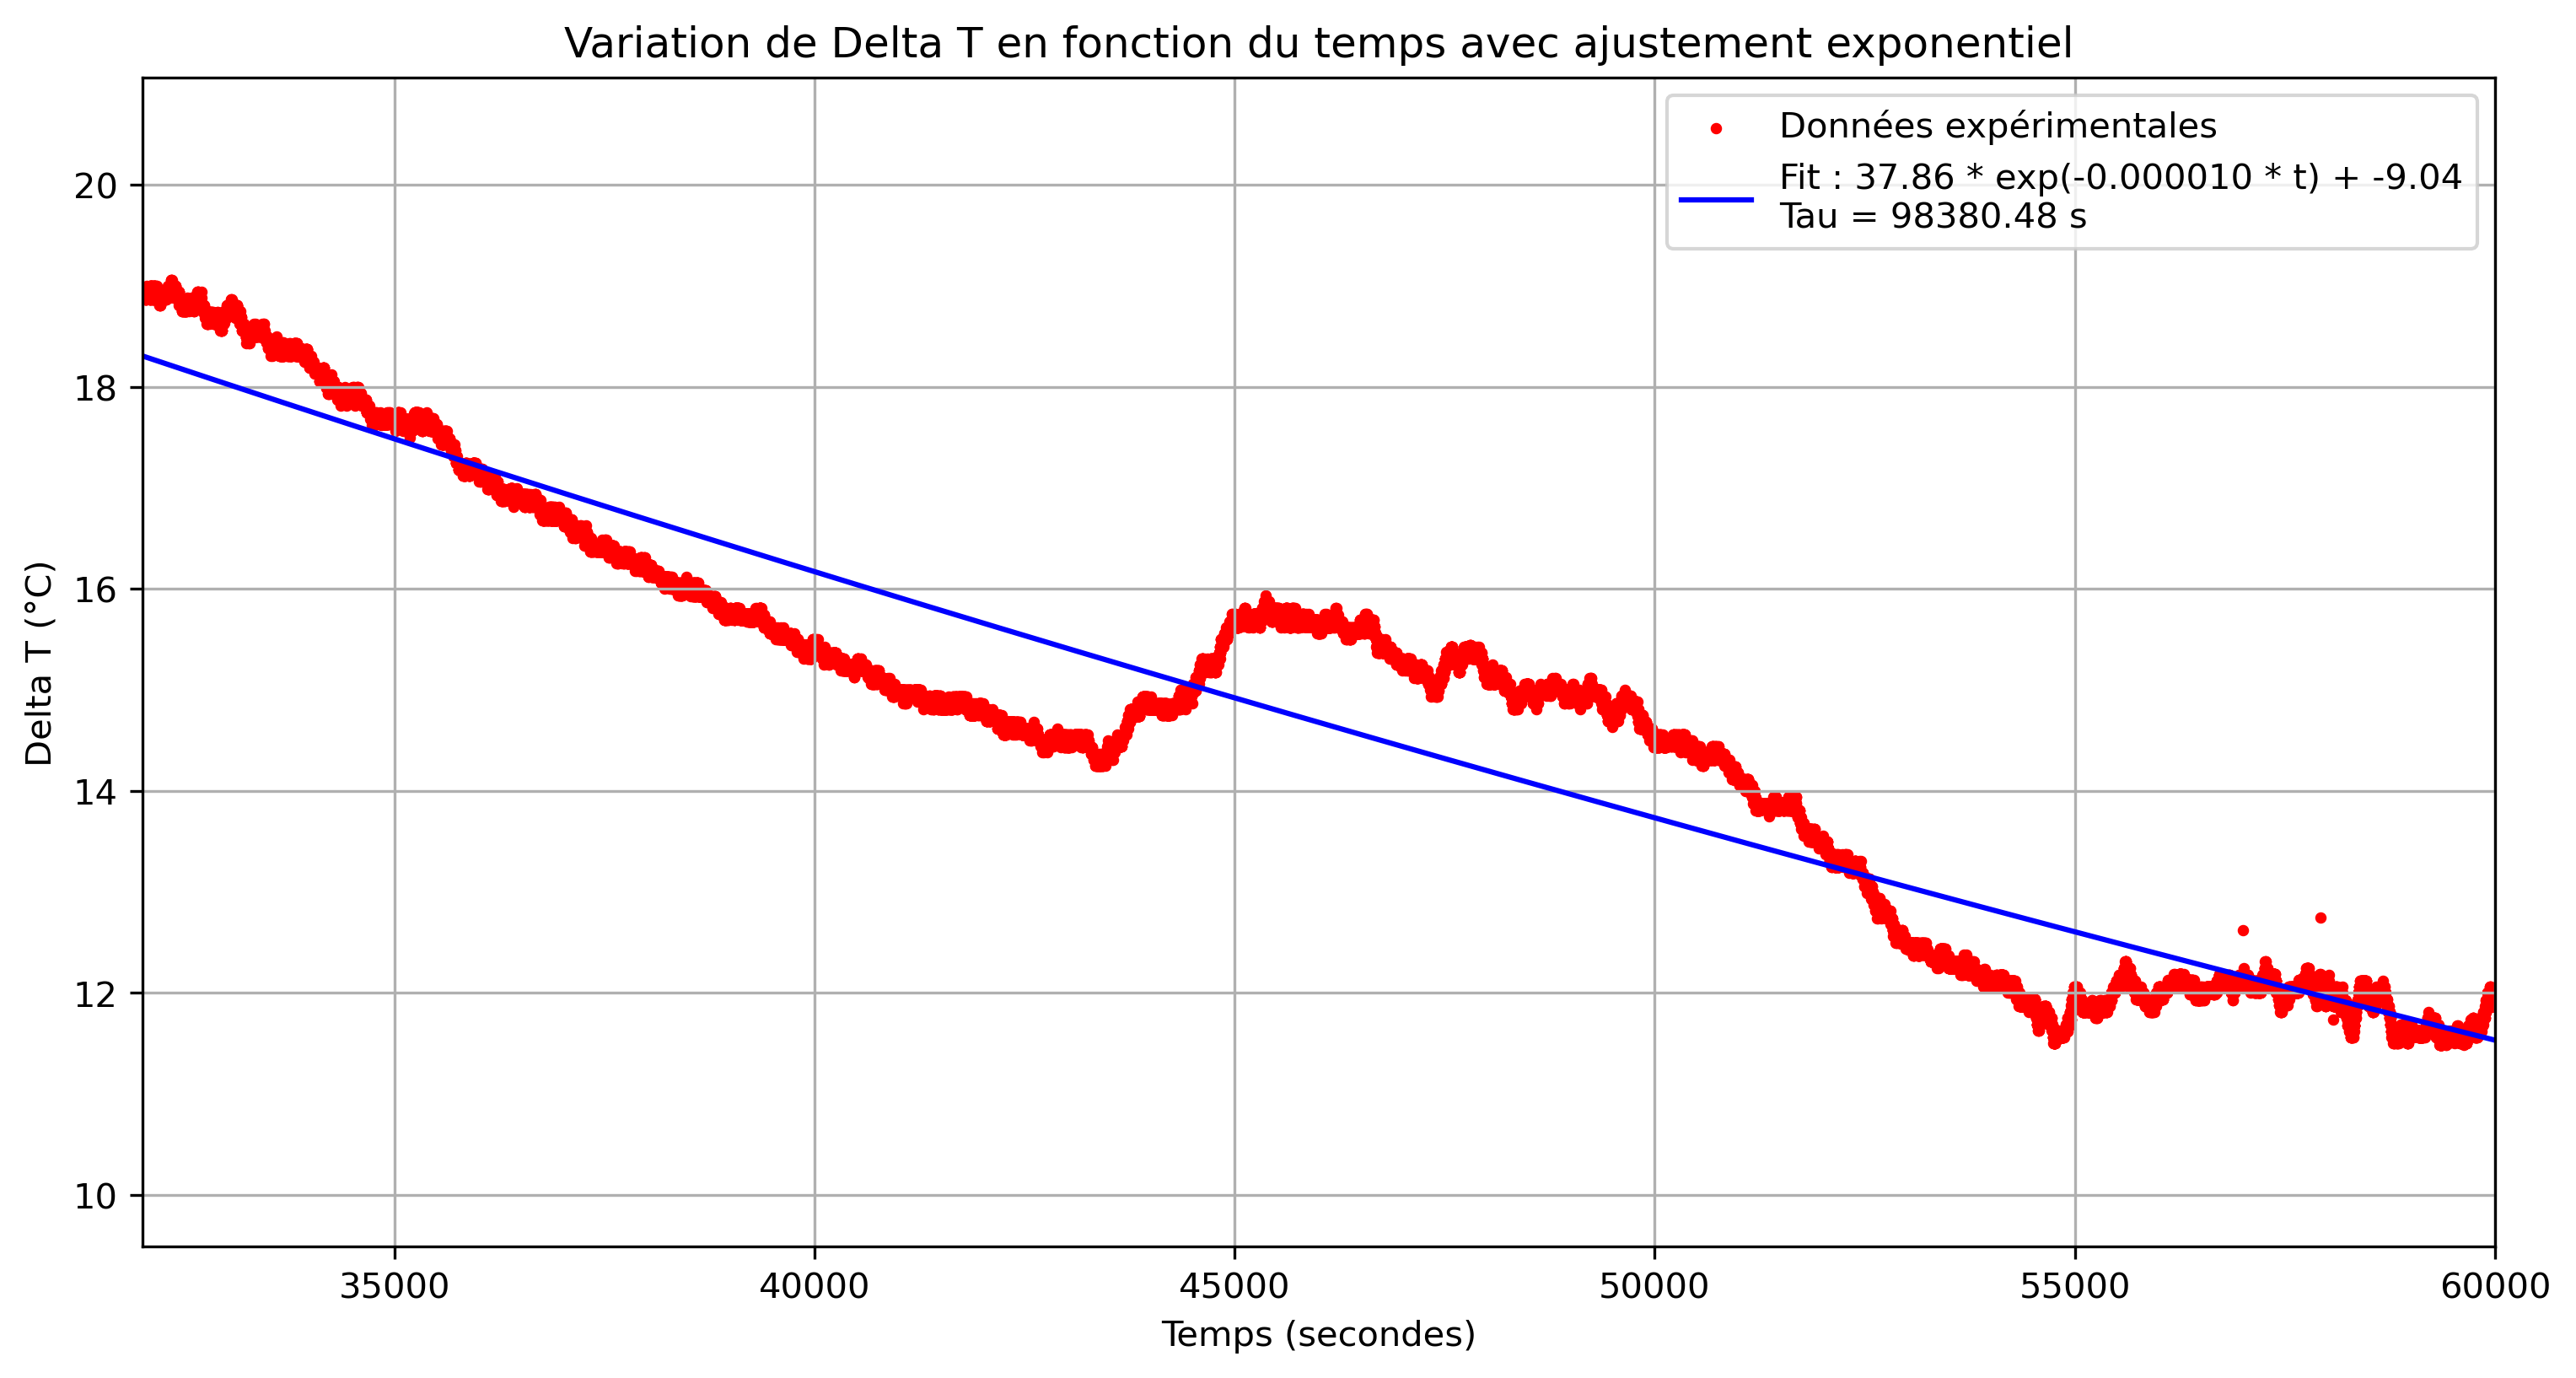

Équation ajustée : ΔT(t) = 37.86 * exp(-0.000010 * t) + -9.04
Valeur estimée de tau : 98380.48 secondes


In [29]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit



# Charger les données expérimentales depuis le fichier

data = np.loadtxt("DATAPELTIER.txt")



# Extraire les colonnes

Tinterne = data[:, 0]
Text = data[:, 1]
Tair = data[:, 2]
temps = np.arange(len(data))  # chaque seconde



# Calcul de Delta T
# 2. Garder uniquement les points entre 50000 et 200000 secondes
mask = (temps >= 32000) & (temps <= 60000)
temps = temps[mask]
Tinterne = Tinterne[mask]
Text = Text[mask]
Tair = Tair[mask]
# 8. Calcul de ΔT


Text_moyenne = np.mean(Text)  # Moyenne

delta_T = Text - Tinterne  # Différence de température







# Définition du modèle exponentiel

def modele_expo(t, A, B, C):

    return A * np.exp(-B * t) + C



# Ajustement des données avec curve_fit

params_opt, params_cov = curve_fit(modele_expo, temps, delta_T, p0=[max(delta_T), 1e-5, min(delta_T)])

A_opt, B_opt, C_opt = params_opt



# Calcul de tau

tau = 1 / B_opt



# Tracer la courbe expérimentale

plt.figure(figsize=(12, 6), dpi=300)

plt.scatter(temps, delta_T, label="Données expérimentales", color='red', s=5)

plt.plot(temps, modele_expo(temps, *params_opt), label=f"Fit : {A_opt:.2f} * exp(-{B_opt:.6f} * t) + {C_opt:.2f}\nTau = {tau:.2f} s", color='blue')



# Ajuster les axes

plt.xlim(min(temps), max(temps))

plt.ylim(min(delta_T) - 2, max(delta_T) + 2)



# Ajouter des légendes et titres

plt.xlabel("Temps (secondes)")

plt.ylabel("Delta T (°C)")

plt.title("Variation de Delta T en fonction du temps avec ajustement exponentiel")

plt.legend()

plt.grid(True)



# Enregistrer l'image

plt.savefig("Delta_T_vs_temps_fit_peltier.png", format="png", dpi=300, bbox_inches="tight")

plt.show()



# Affichage de l'équation ajustée

print(f"Équation ajustée : ΔT(t) = {A_opt:.2f} * exp(-{B_opt:.6f} * t) + {C_opt:.2f}")

print(f"Valeur estimée de tau : {tau:.2f} secondes")

✅ Constante de temps ajustée : tau = 29842.11 s


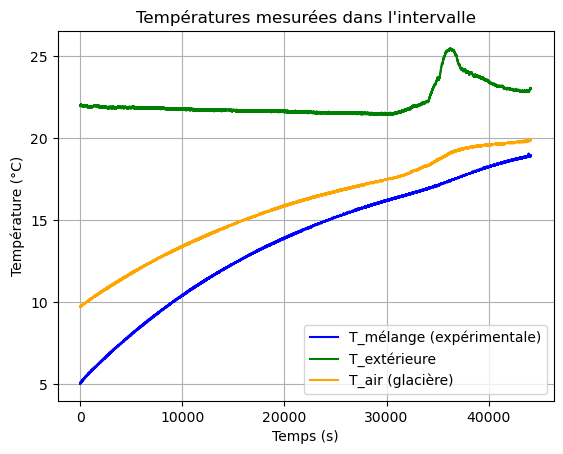

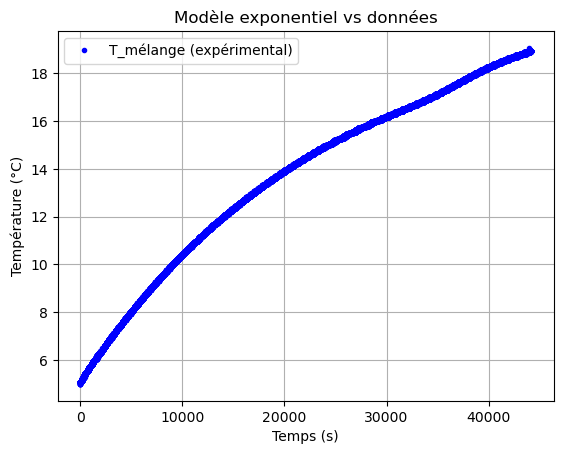

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Lecture du fichier
data = np.loadtxt('Donnee.txt')
Tinterne = data[:, 1]
Text = data[:, 0]
Tair = data[:, 2]
temps = np.arange(len(data))  # chaque seconde

# 2. Garder uniquement les points entre 50000 et 200000 secondes


# 3. Tracer les températures expérimentales
plt.figure()
plt.plot(temps, Tinterne, label="T_mélange (expérimentale)", color="blue")
plt.plot(temps, Text, label="T_extérieure", color="green")
plt.plot(temps, Tair, label="T_air (glacière)", color="orange")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Températures mesurées dans l'intervalle")
plt.legend()
plt.grid(True)
plt.savefig("01_temperatures_experimentales_50.png", dpi=300)

# 4. Calcul de Text moyenne
Text_moyenne = np.mean(Text)

# 5. Définir modèle exponentiel
def modele_exponentiel(t, tau):
    T0 = 6
    return Text_moyenne + (T0 - Text_moyenne) * np.exp(-t / tau)

# 6. Ajustement
popt, _ = curve_fit(modele_exponentiel, temps, Tinterne, p0=[100])
tau_fit = popt[0]

# 7. Tracer modèle théorique
Ttheorique = modele_exponentiel(temps, tau_fit)

plt.figure()
plt.plot(temps, Tinterne, 'b.', label="T_mélange (expérimental)")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Modèle exponentiel vs données")
plt.legend()
plt.grid(True)
plt.savefig("02_modele_theorique_50.png", dpi=300)

print(f"✅ Constante de temps ajustée : tau = {tau_fit:.2f} s")


✅ Constante de temps ajustée : tau = 29170.99 s


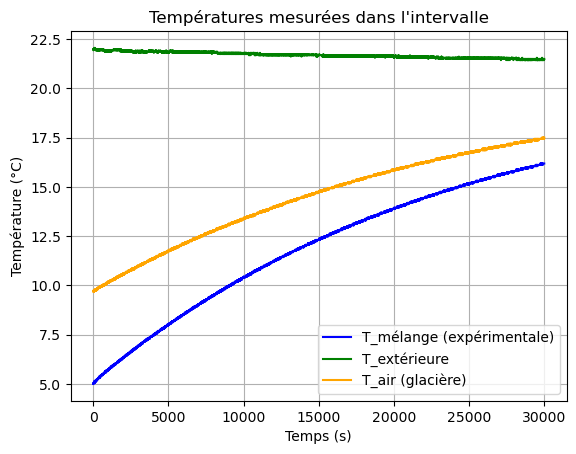

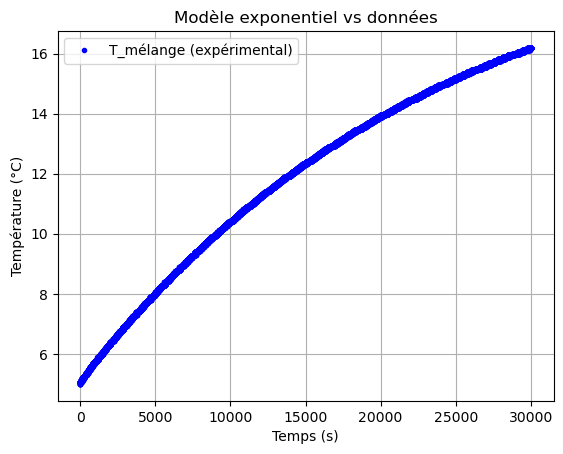

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Lecture du fichier
data = np.loadtxt('Donnee.txt')
Tinterne = data[:, 1]
Text = data[:, 0]
Tair = data[:, 2]
temps = np.arange(len(data))  # chaque seconde

# 2. Garder uniquement les points entre 50000 et 200000 secondes

# 2. Garder uniquement les points entre 50000 et 200000 secondes
mask = (temps >= 0) & (temps <= 30000)
temps = temps[mask]
Tinterne = Tinterne[mask]
Text = Text[mask]
Tair = Tair[mask]
# 3. Tracer les températures expérimentales
plt.figure()
plt.plot(temps, Tinterne, label="T_mélange (expérimentale)", color="blue")
plt.plot(temps, Text, label="T_extérieure", color="green")
plt.plot(temps, Tair, label="T_air (glacière)", color="orange")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Températures mesurées dans l'intervalle")
plt.legend()
plt.grid(True)
plt.savefig("01_temperatures_experimentales_50_limite.png", dpi=300)

# 4. Calcul de Text moyenne
Text_moyenne = np.mean(Text)

# 5. Définir modèle exponentiel
def modele_exponentiel(t, tau):
    T0 = 6
    return Text_moyenne + (T0 - Text_moyenne) * np.exp(-t / tau)

# 6. Ajustement
popt, _ = curve_fit(modele_exponentiel, temps, Tinterne, p0=[100])
tau_fit = popt[0]

# 7. Tracer modèle théorique
Ttheorique = modele_exponentiel(temps, tau_fit)

plt.figure()
plt.plot(temps, Tinterne, 'b.', label="T_mélange (expérimental)")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.title("Modèle exponentiel vs données")
plt.legend()
plt.grid(True)
plt.savefig("02_modele_theorique_50_limite.png", dpi=300)

print(f"✅ Constante de temps ajustée : tau = {tau_fit:.2f} s")


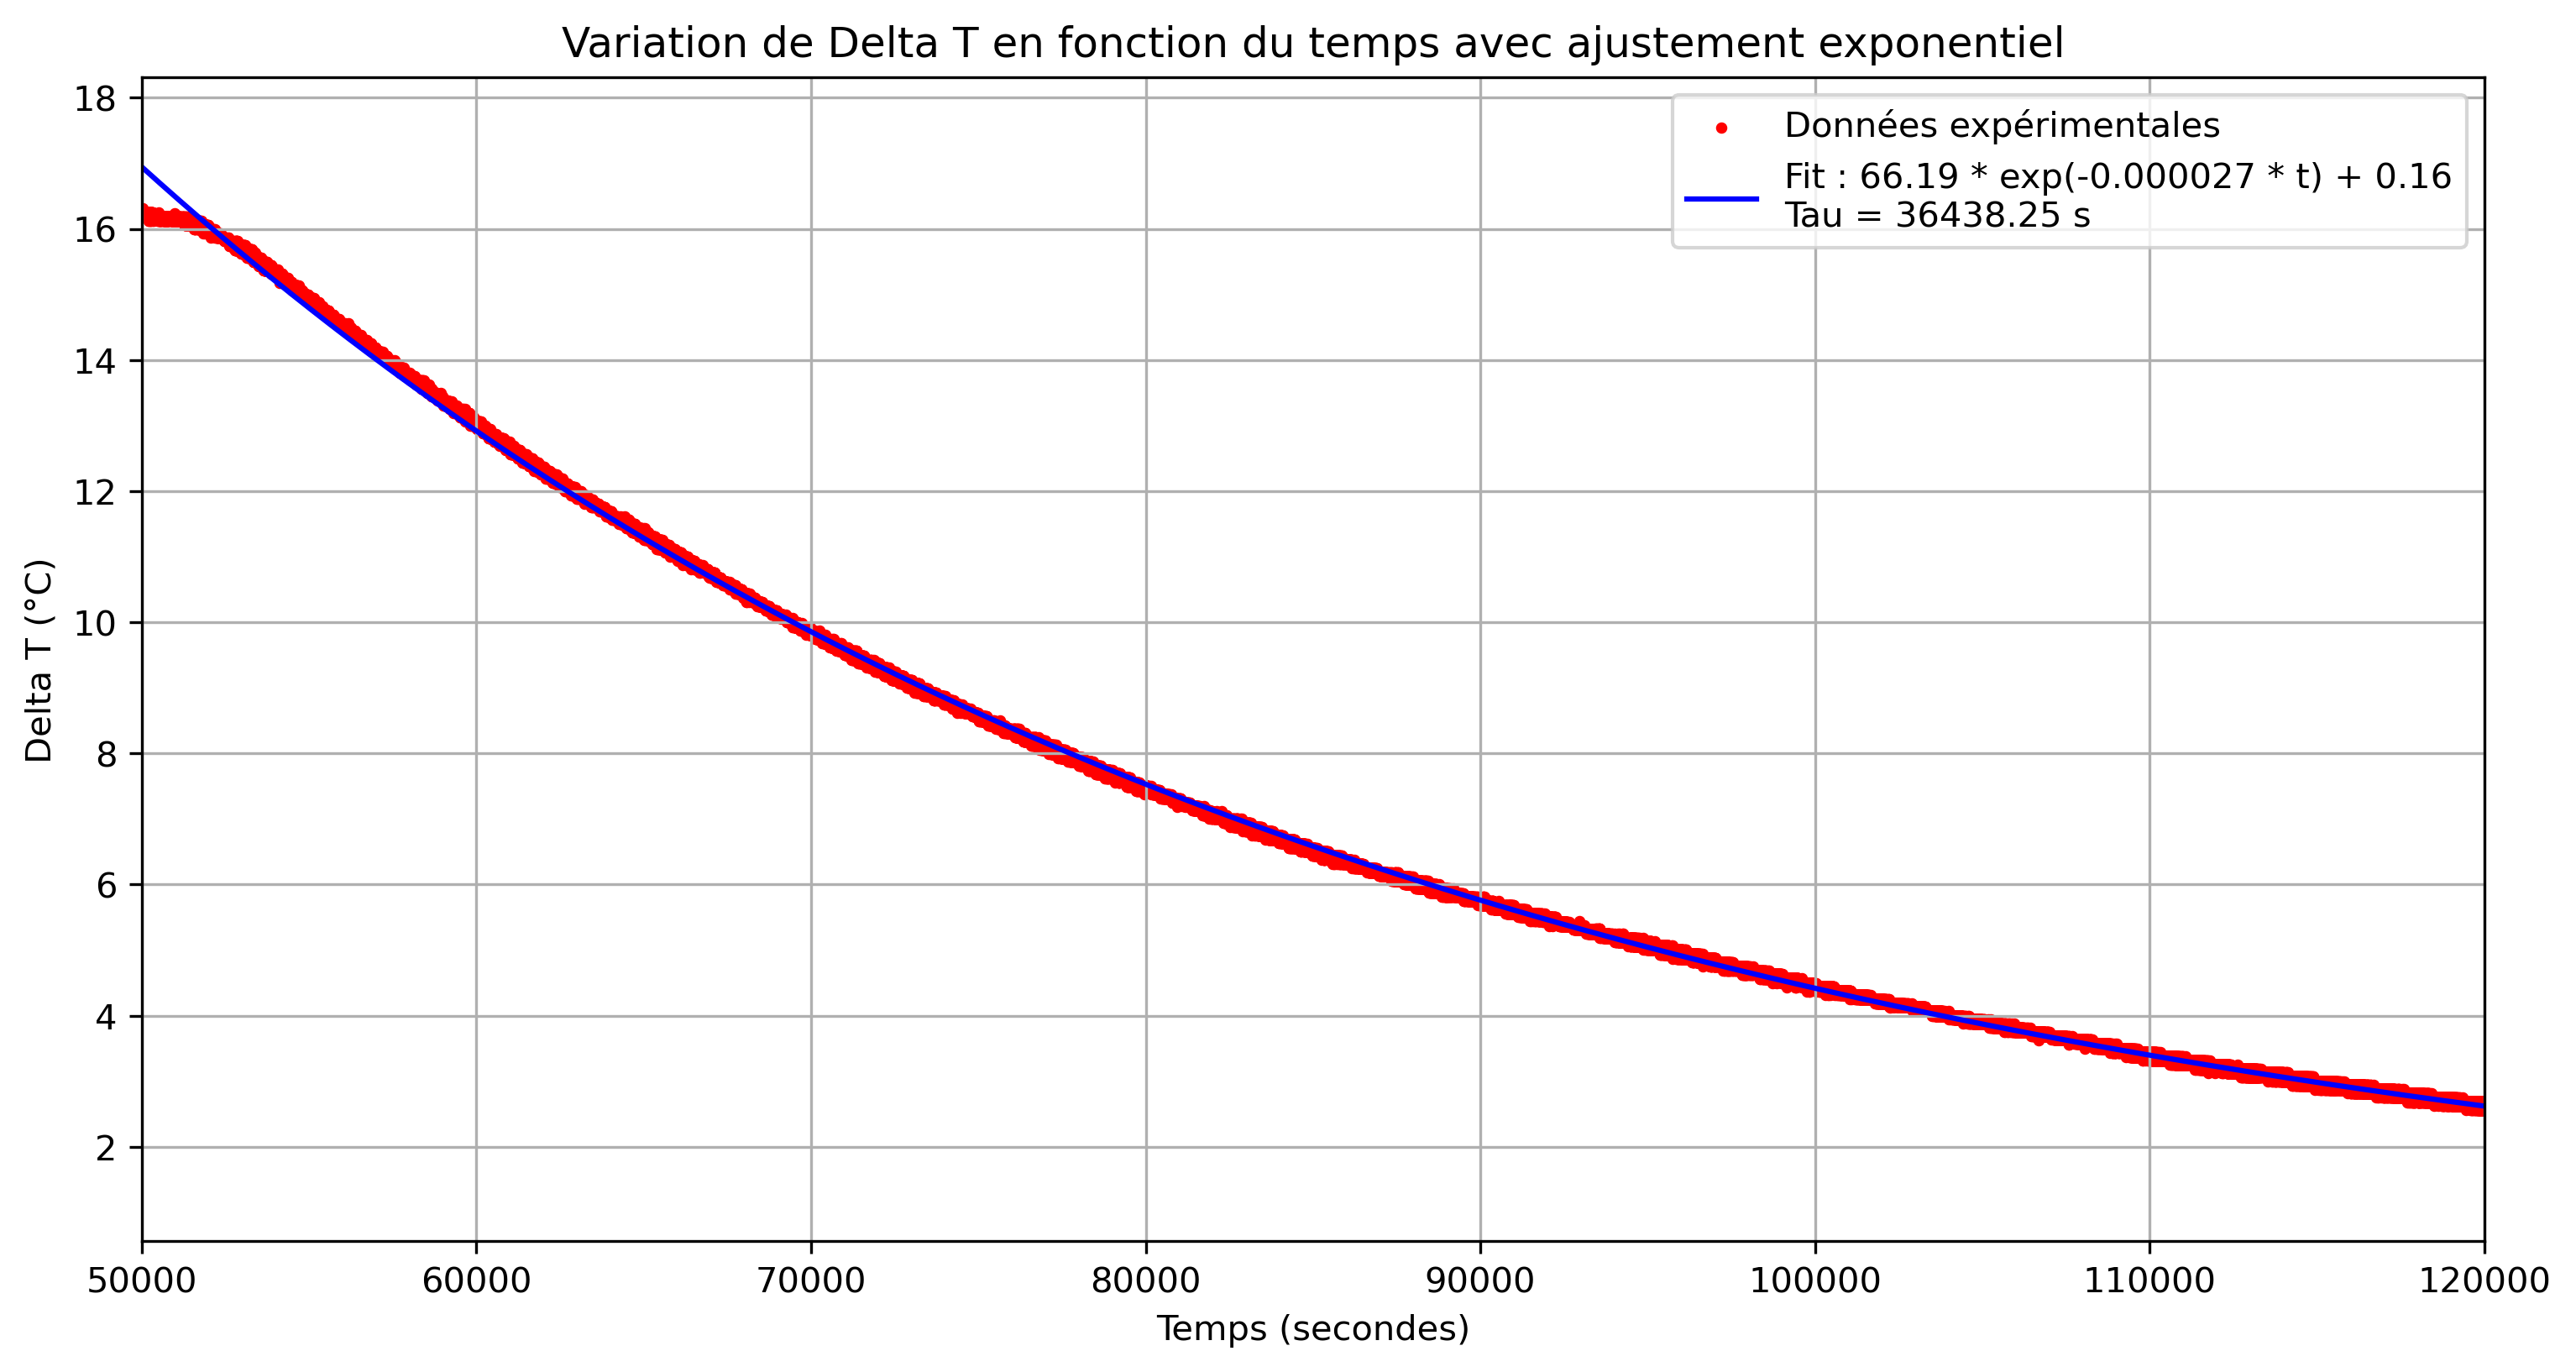

Équation ajustée : ΔT(t) = 66.19 * exp(-0.000027 * t) + 0.16
Valeur estimée de tau : 36438.25 secondes


In [46]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit



# Charger les données expérimentales depuis le fichier

data = np.loadtxt("donne2.txt")



# Extraire les colonnes

Tinterne = data[:, 0]
Text = data[:, 1]
Tair = data[:, 2]
temps = np.arange(len(data))  # chaque seconde



# Calcul de Delta T
# 2. Garder uniquement les points entre 50000 et 200000 secondes
mask = (temps >= 50000) & (temps <= 120000)
temps = temps[mask]
Tinterne = Tinterne[mask]
Text = Text[mask]
Tair = Tair[mask]
# 8. Calcul de ΔT


Text_moyenne = np.mean(Text)  # Moyenne

delta_T = Text - Tinterne  # Différence de température







# Définition du modèle exponentiel

def modele_expo(t, A, B, C):

    return A * np.exp(-B * t) + C



# Ajustement des données avec curve_fit

params_opt, params_cov = curve_fit(modele_expo, temps, delta_T, p0=[max(delta_T), 1e-5, min(delta_T)])

A_opt, B_opt, C_opt = params_opt



# Calcul de tau

tau = 1 / B_opt



# Tracer la courbe expérimentale

plt.figure(figsize=(12, 6), dpi=300)

plt.scatter(temps, delta_T, label="Données expérimentales", color='red', s=5)

plt.plot(temps, modele_expo(temps, *params_opt), label=f"Fit : {A_opt:.2f} * exp(-{B_opt:.6f} * t) + {C_opt:.2f}\nTau = {tau:.2f} s", color='blue')



# Ajuster les axes

plt.xlim(min(temps), max(temps))

plt.ylim(min(delta_T) - 2, max(delta_T) + 2)



# Ajouter des légendes et titres

plt.xlabel("Temps (secondes)")

plt.ylabel("Delta T (°C)")

plt.title("Variation de Delta T en fonction du temps avec ajustement exponentiel")

plt.legend()

plt.grid(True)



# Enregistrer l'image

plt.savefig("Delta_T_vs_temps_fit_50.png", format="png", dpi=300, bbox_inches="tight")

plt.show()



# Affichage de l'équation ajustée

print(f"Équation ajustée : ΔT(t) = {A_opt:.2f} * exp(-{B_opt:.6f} * t) + {C_opt:.2f}")

print(f"Valeur estimée de tau : {tau:.2f} secondes")

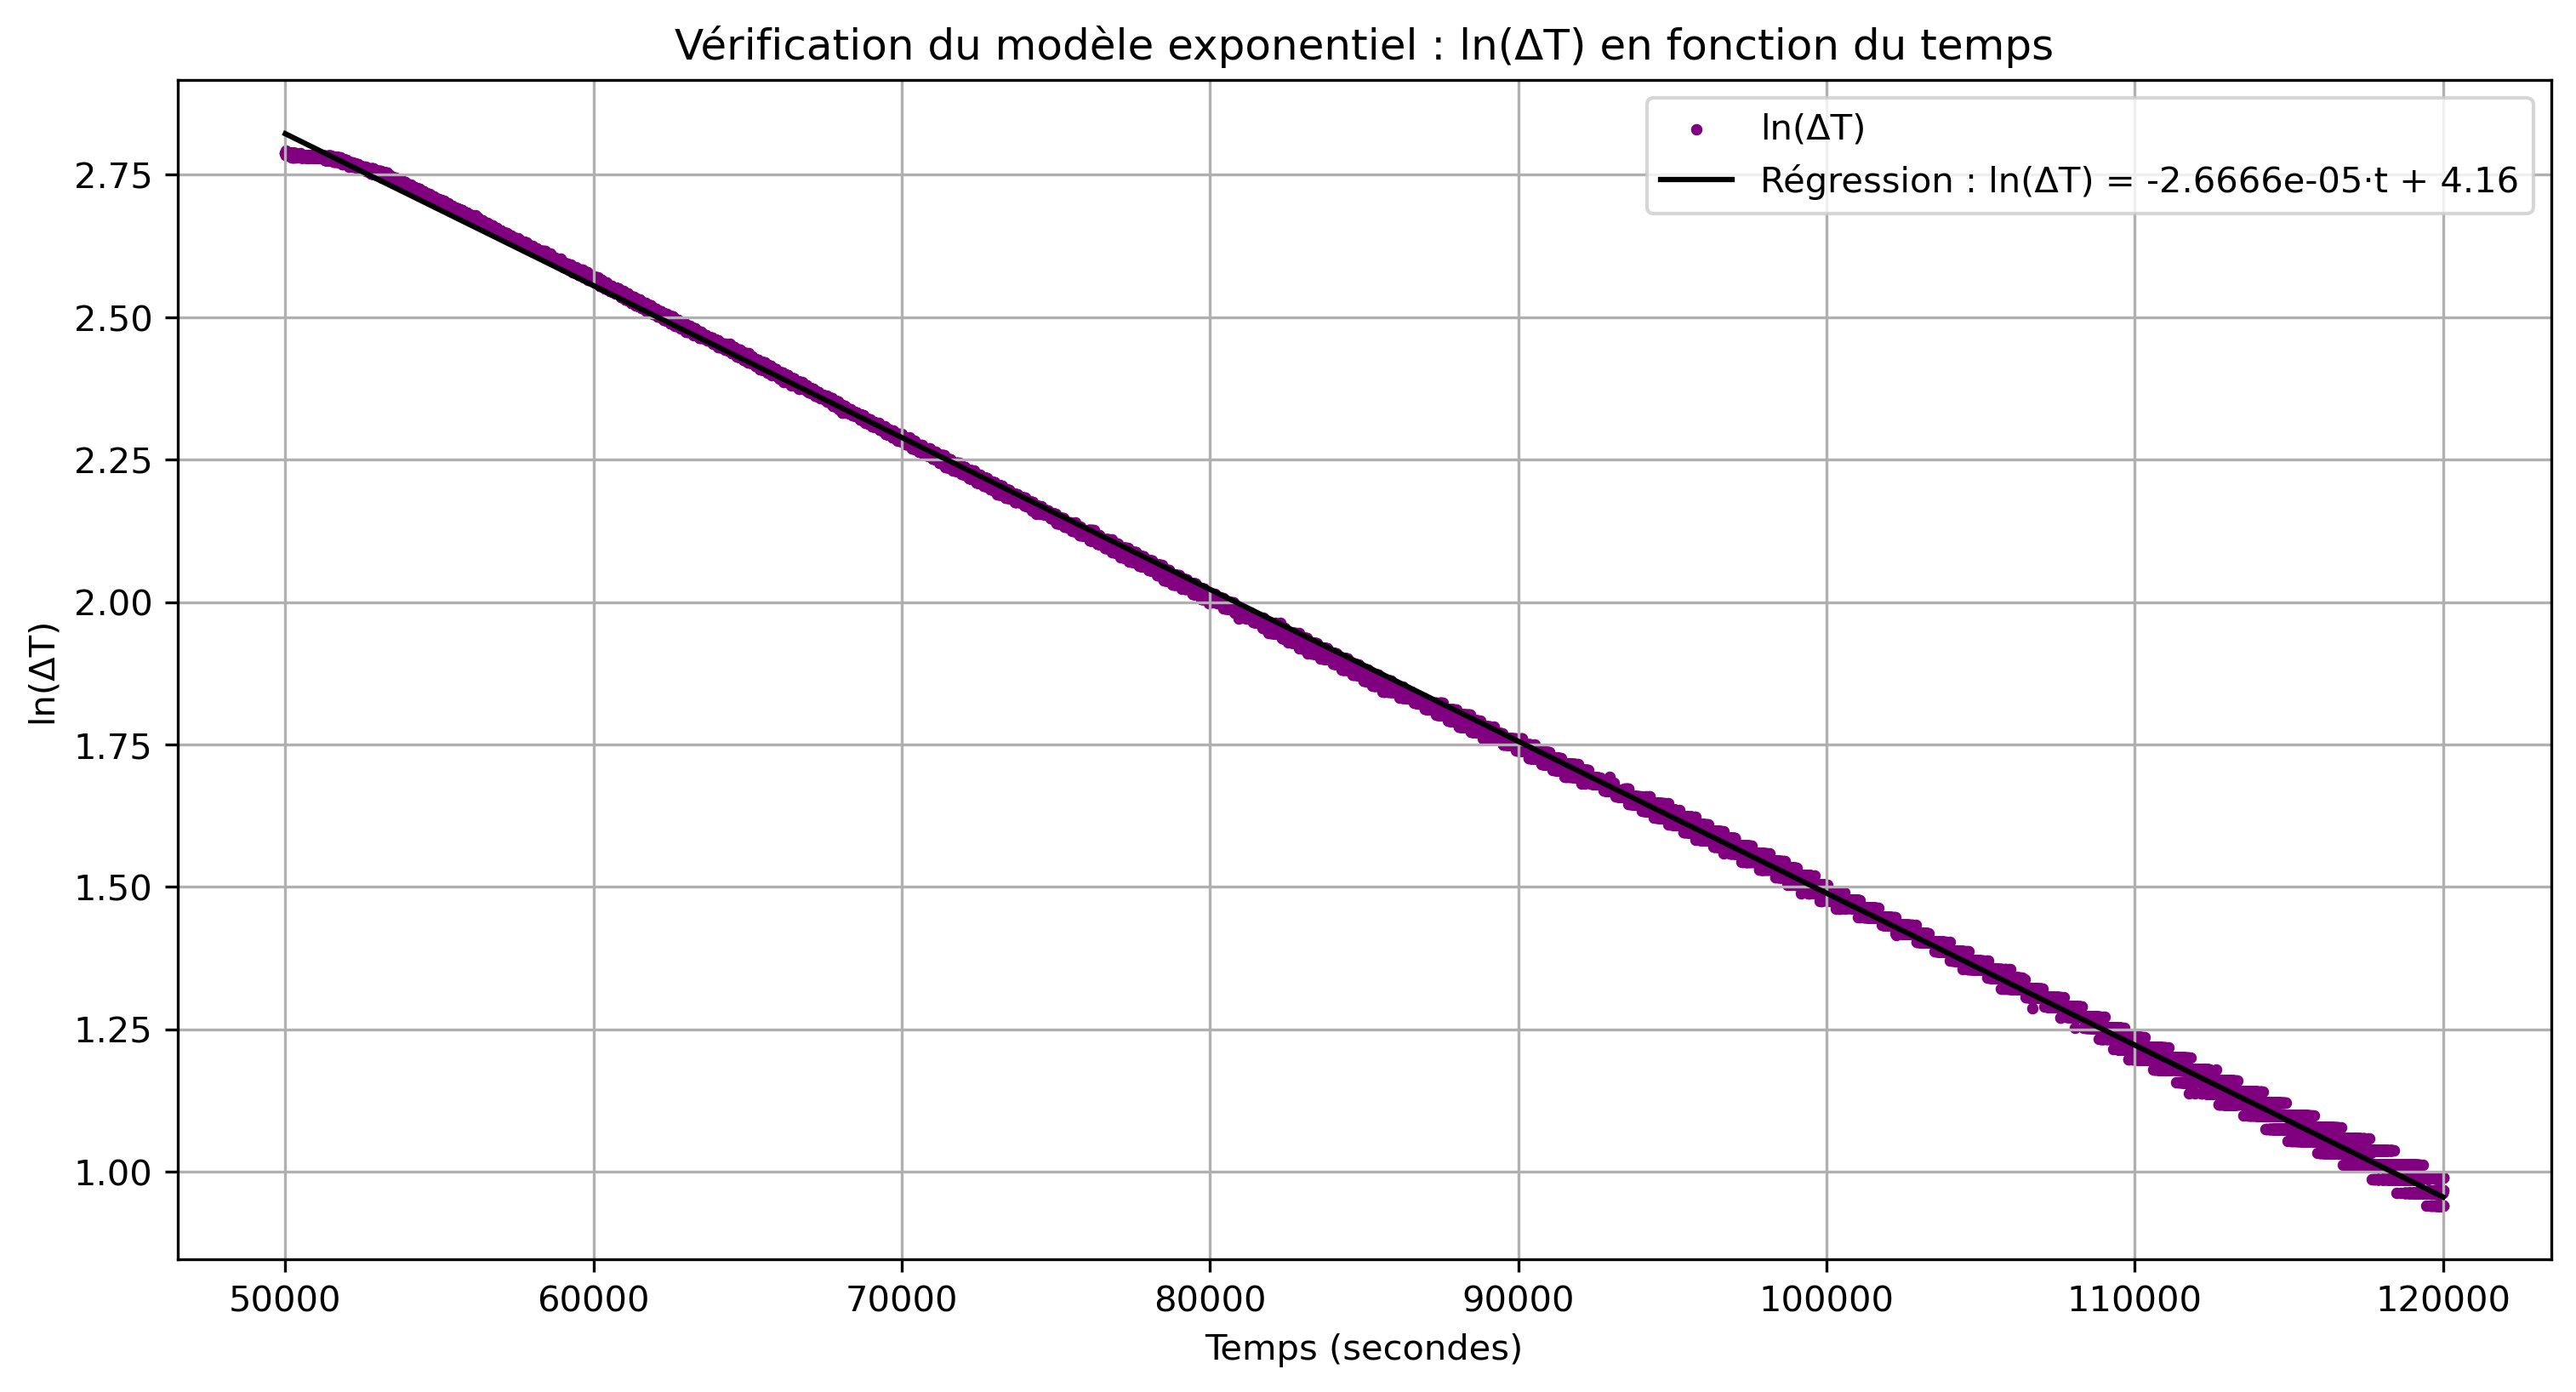

✅ Équation ajustée : ln(ΔT) = -2.6666e-05 * t + 4.16
➡️  Coefficient de corrélation R² = 0.9996


In [48]:
from scipy.stats import linregress

# Filtrer les valeurs où delta_T > 0
mask_positive = delta_T > 0
temps_ln = temps[mask_positive]
delta_T_ln = delta_T[mask_positive]
ln_delta_T = np.log(delta_T_ln)

# Régression linéaire : ln(ΔT) = a * t + b
slope, intercept, r_value, p_value, std_err = linregress(temps_ln, ln_delta_T)

# Équation droite : ln(ΔT) = slope * t + intercept
ln_fit = slope * temps_ln + intercept

# Tracer ln(ΔT)
plt.figure(figsize=(12, 6), dpi=300)
plt.scatter(temps_ln, ln_delta_T, label="ln(ΔT)", color="purple", s=5)
plt.plot(temps_ln, ln_fit, label=f"Régression : ln(ΔT) = {slope:.4e}·t + {intercept:.2f}", color="black")

# Ajustements esthétiques
plt.xlabel("Temps (secondes)")
plt.ylabel("ln(ΔT)")
plt.title("Vérification du modèle exponentiel : ln(ΔT) en fonction du temps")
plt.legend()
plt.grid(True)

# Sauvegarde de l'image
plt.savefig("ln_DeltaT_vs_temps_50.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

# Affichage des résultats
print(f"✅ Équation ajustée : ln(ΔT) = {slope:.4e} * t + {intercept:.2f}")
print(f"➡️  Coefficient de corrélation R² = {r_value**2:.4f}")


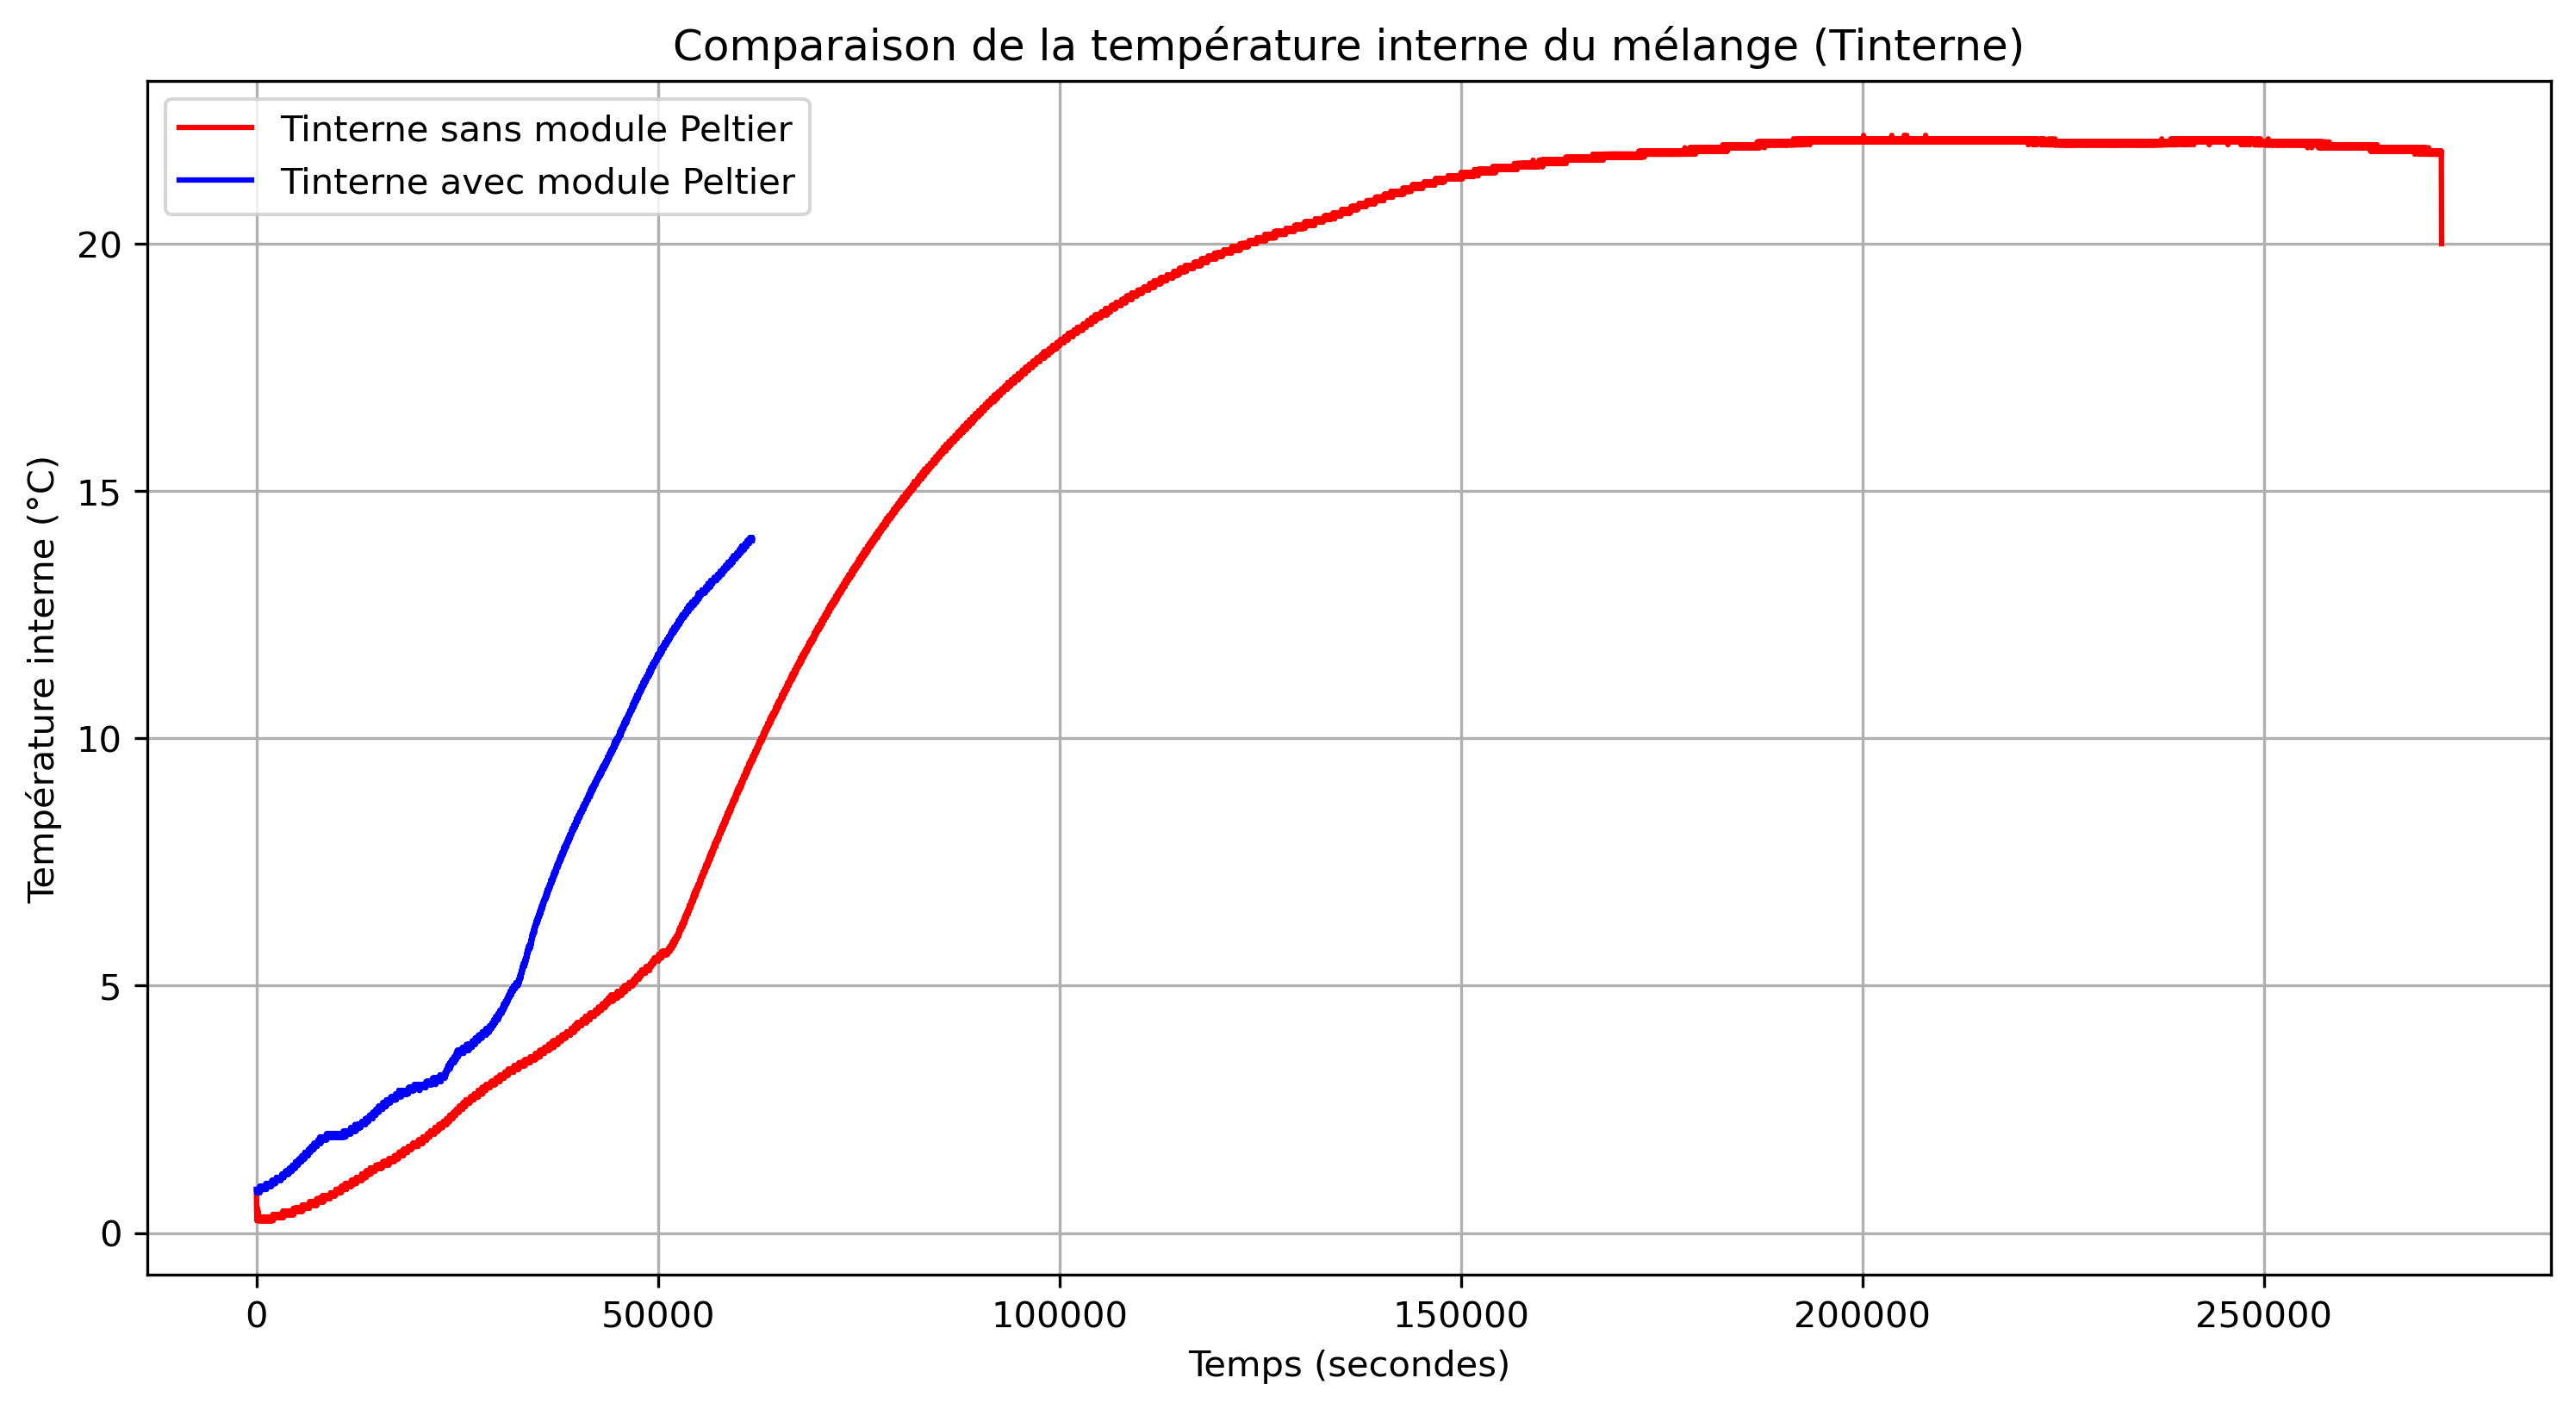

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
data_sans = np.loadtxt("donne2.txt")
data_avec = np.loadtxt("DATAPELTIER.txt")

# Extraire Tinterne
Tinterne_sans = data_sans[:, 0]
Tinterne_avec = data_avec[:, 0]

# Générer les temps pour chaque expérience
temps_sans = np.arange(len(Tinterne_sans))
temps_avec = np.arange(len(Tinterne_avec))



# Tracer les courbes
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(temps_sans, Tinterne_sans, label="Tinterne sans module Peltier", color='red')
plt.plot(temps_avec, Tinterne_avec, label="Tinterne avec module Peltier", color='blue')

# Titres et légendes
plt.title("Comparaison de la température interne du mélange (Tinterne)")
plt.xlabel("Temps (secondes)")
plt.ylabel("Température interne (°C)")
plt.legend()
plt.grid(True)

# Enregistrer l'image
plt.savefig("comparaison_Tinterne_Peltier.png", format="png", dpi=300, bbox_inches="tight")
plt.show()
